<a href="https://colab.research.google.com/github/12345997/WEEK-6-CORE-IP-Machine-learning/blob/main/WEEK_6_core_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fifa dataset configuration

#1.0 Defining the question

## Specifying the Data Analytic Question

###Defining the metric of success



```
#To find the probability that a team will win a home game or an away game
```



###Data relevance

the aim of this project is to predic the probability of anaway or a home team winning a game

#2.0 Importing the Libraries

In [94]:
# Importing the relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt



#3.0 Loading the data

In [95]:
#Reading the data into our environmet
results=pd.read_csv("results.csv")

In [96]:
#Reading the data into our environmet
fifa_ranking=pd.read_csv("/content/fifa_ranking.csv")

#4.0 Previewing the dataset

In [97]:
#checking the number of records
fifa_ranking.shape

(57793, 16)

In [98]:
#checking the number of records
results.shape

(40839, 9)

In [99]:
#previewing the first five records
results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [100]:
#previewing  the last five records
results.tail(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [101]:
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [102]:
#previewing the last five records
fifa_ranking.tail(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [103]:
#checking the datatypes in each column
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [104]:
#checking the datatypes in each column
fifa_ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [105]:
#Checking the data's info
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [106]:
# Changing the columns to lower case
fifa_ranking.columns = fifa_ranking.columns.str.lower()
fifa_ranking.head(0)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date


In [107]:
# Get ranking data for home team
home = pd.merge(results, fifa_ranking, how = 'inner', left_on=['date', 'home_team'], right_on=['rank_date', 'country_full'])
home 
# Get ranking data for away team 
away = pd.merge(results, fifa_ranking, how = 'inner', left_on=['date', 'away_team'], right_on=['rank_date', 'country_full'])
away
final = pd.merge(home, away, how='inner', left_on=['date', 'away_team', 'home_score', 'away_score', 
                                                  'home_team', 'tournament', 'country'], right_on=['date', 'away_team', 
                                                  'home_score', 'away_score', 'home_team', 'tournament', 'country'])

In [108]:
#previewing our dataset
final.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city_x,country,neutral_x,rank_x,country_full_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,confederation_x,rank_date_x,city_y,neutral_y,rank_y,country_full_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,Bolivia,BOL,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,La Paz,False,22,Uruguay,URU,0.0,47,-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Maceió,False,14,Mexico,MEX,0.0,42,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,Ecuador,ECU,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Quito,False,94,Venezuela,VEN,0.0,4,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,Guinea,GUI,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Conakry,False,86,Sierra Leone,SLE,0.0,16,-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,Paraguay,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Asunción,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


#5.0 Data Preparation

###Checking for null values

In [109]:
#checking for null values
final.isnull().any()

date                         False
home_team                    False
away_team                    False
home_score                   False
away_score                   False
tournament                   False
city_x                       False
country                      False
neutral_x                    False
rank_x                       False
country_full_x               False
country_abrv_x               False
total_points_x               False
previous_points_x            False
rank_change_x                False
cur_year_avg_x               False
cur_year_avg_weighted_x      False
last_year_avg_x              False
last_year_avg_weighted_x     False
two_year_ago_avg_x           False
two_year_ago_weighted_x      False
three_year_ago_avg_x         False
three_year_ago_weighted_x    False
confederation_x              False
rank_date_x                  False
city_y                       False
neutral_y                    False
rank_y                       False
country_full_y      

In [110]:
#checking the data
final.dtypes

date                          object
home_team                     object
away_team                     object
home_score                     int64
away_score                     int64
tournament                    object
city_x                        object
country                       object
neutral_x                       bool
rank_x                         int64
country_full_x                object
country_abrv_x                object
total_points_x               float64
previous_points_x              int64
rank_change_x                  int64
cur_year_avg_x               float64
cur_year_avg_weighted_x      float64
last_year_avg_x              float64
last_year_avg_weighted_x     float64
two_year_ago_avg_x           float64
two_year_ago_weighted_x      float64
three_year_ago_avg_x         float64
three_year_ago_weighted_x    float64
confederation_x               object
rank_date_x                   object
city_y                        object
neutral_y                       bool
r

In [111]:
#checking our dataset shape
final.shape

(871, 43)

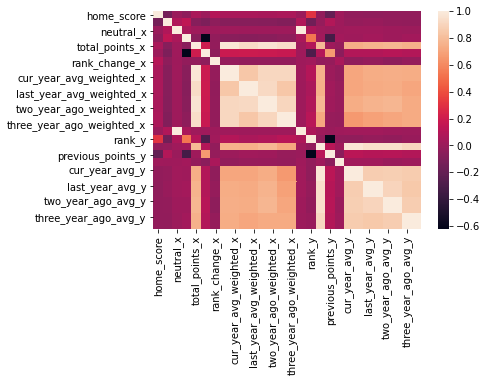

In [112]:
import seaborn as sb
sb.heatmap(final.corr()) 

In [113]:
final.describe()

,home_score,away_score,rank_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,rank_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,1.632606,1.004592,65.549943,38.543123,464.027555,-0.079219,19.919989,19.919989,18.633548,9.316820,19.001493,5.700482,18.029437,3.605901,69.918485,30.606923,448.623421,0.140069,15.080597,15.080597,15.468990,7.734489,15.843766,4.753123,15.193846,3.038749
std,1.905960,1.154691,47.557993,160.974942,301.538498,4.480037,84.468506,84.468506,85.822417,42.911114,81.884473,24.565459,77.406453,15.481310,50.497652,134.737527,315.851144,4.834135,70.112456,70.112456,69.484839,34.742438,73.406703,22.021957,68.798778,13.759731
min,0.000000,0.000000,1.000000,0.000000,0.000000,-22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,231.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,172.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,58.000000,0.000000,485.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,452.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,95.000000,0.000000,652.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,102.500000,0.000000,629.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,9.000000,206.000000,1273.690000,1683.000000,38.000000,788.680000,788.680000,1008.940000,504.470000,748.610000,224.580000,640.010000,128.000000,209.000000,1181.430000,1883.000000,34.000000,817.580000,817.580000,617.620000,308.810000,637.290000,191.190000,665.550000,133.110000


###Checking for duplicates

In [114]:
# Checking if our data contains any duplicate values
final.duplicated().sum()

0

checking for outliers

In [115]:
# Using the IQR formula
Q1 = final.quantile(0.25)
Q3 = final.quantile(0.75)
IQR = Q3 - Q1
((final< (Q1 - 1.5 * IQR)) | (final> (Q3 + 1.5 * IQR))).sum()

away_score                     6
away_team                      0
city_x                         0
city_y                         0
confederation_x                0
confederation_y                0
country                        0
country_abrv_x                 0
country_abrv_y                 0
country_full_x                 0
country_full_y                 0
cur_year_avg_weighted_x       68
cur_year_avg_weighted_y       65
cur_year_avg_x                68
cur_year_avg_y                65
date                           0
home_score                    23
home_team                      0
last_year_avg_weighted_x      66
last_year_avg_weighted_y      64
last_year_avg_x               66
last_year_avg_y               64
neutral_x                    138
neutral_y                    138
previous_points_x              8
previous_points_y             16
rank_change_x                 85
rank_change_y                142
rank_date_x                    0
rank_date_y                    0
rank_x    

the outliers weren't dropped because they were a representation of the data and dropping them would change our dataset

In [116]:
final.shape

(871, 43)

In [118]:
final.tournament.unique()

array(['FIFA World Cup qualification', 'Friendly', 'Merdeka Tournament',
       'South Pacific Games', 'African Cup of Nations',
       'CFU Caribbean Cup qualification', 'Copa América',
       'UEFA Euro qualification',
       'United Arab Emirates Friendship Tournament', 'UNCAF Cup',
       'Korea Cup', 'Gold Cup', 'AFC Asian Cup qualification', 'USA Cup',
       'Millennium Cup', "King's Cup", 'CFU Caribbean Cup', 'Gulf Cup',
       'Cyprus International Tournament',
       'Malta International Tournament', 'UAFA Cup', 'AFF Championship',
       'SAFF Cup', 'Gold Cup qualification', "Prime Minister's Cup",
       'Confederations Cup', 'AFC Asian Cup', 'Nehru Cup', 'COSAFA Cup',
       'CECAFA Cup', 'EAFF Championship',
       'AFC Challenge Cup qualification',
       'African Cup of Nations qualification', 'Copa del Pacífico',
       'Oceania Nations Cup', 'African Nations Championship',
       'Windward Islands Tournament', 'Intercontinental Cup'],
      dtype=object)

In [119]:
final.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city_x', 'country', 'neutral_x', 'rank_x',
       'country_full_x', 'country_abrv_x', 'total_points_x',
       'previous_points_x', 'rank_change_x', 'cur_year_avg_x',
       'cur_year_avg_weighted_x', 'last_year_avg_x',
       'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_date_x', 'city_y',
       'neutral_y', 'rank_y', 'country_full_y', 'country_abrv_y',
       'total_points_y', 'previous_points_y', 'rank_change_y',
       'cur_year_avg_y', 'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',
       'three_year_ago_weighted_y', 'confederation_y', 'rank_date_y'],
      dtype='object')

In [120]:
final.drop(["tournament",'city_x', 'country','country_full_x','country_abrv_x'],axis=1, inplace=True)

In [121]:
final.head()

,date,home_team,away_team,home_score,away_score,neutral_x,rank_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,confederation_x,rank_date_x,city_y,neutral_y,rank_y,country_full_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,False,59,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,La Paz,False,22,Uruguay,URU,0.0,47,-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,False,8,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Maceió,False,14,Mexico,MEX,0.0,42,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,False,35,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Quito,False,94,Venezuela,VEN,0.0,4,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,False,65,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Conakry,False,86,Sierra Leone,SLE,0.0,16,-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,False,67,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Asunción,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [122]:
final.drop(["total_points_x","cur_year_avg_x","cur_year_avg_weighted_x","last_year_avg_x","last_year_avg_weighted_x","two_year_ago_avg_x","two_year_ago_weighted_x"],axis=1, inplace=True)

In [123]:
final.head(2)

,date,home_team,away_team,home_score,away_score,neutral_x,rank_x,previous_points_x,rank_change_x,three_year_ago_avg_x,three_year_ago_weighted_x,confederation_x,rank_date_x,city_y,neutral_y,rank_y,country_full_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,False,59,13,28,0.0,0.0,CONMEBOL,1993-08-08,La Paz,False,22,Uruguay,URU,0.0,47,-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,False,8,55,-5,0.0,0.0,CONMEBOL,1993-08-08,Maceió,False,14,Mexico,MEX,0.0,42,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08


In [124]:
final.drop(["date","three_year_ago_avg_x","three_year_ago_weighted_x","confederation_x","rank_date_x","city_y","country_full_y","country_abrv_y"],axis=1,inplace=True)

In [125]:
final.drop(["confederation_y","rank_date_y"],axis=1,inplace=True)



#6.0 Exploratory Analysis

##categorical variables

In [126]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   home_team                  871 non-null    object 
 1   away_team                  871 non-null    object 
 2   home_score                 871 non-null    int64  
 3   away_score                 871 non-null    int64  
 4   neutral_x                  871 non-null    bool   
 5   rank_x                     871 non-null    int64  
 6   previous_points_x          871 non-null    int64  
 7   rank_change_x              871 non-null    int64  
 8   neutral_y                  871 non-null    bool   
 9   rank_y                     871 non-null    int64  
 10  total_points_y             871 non-null    float64
 11  previous_points_y          871 non-null    int64  
 12  rank_change_y              871 non-null    int64  
 13  cur_year_avg_y             871 non-null    float64

In [127]:
final.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'neutral_x',
       'rank_x', 'previous_points_x', 'rank_change_x', 'neutral_y', 'rank_y',
       'total_points_y', 'previous_points_y', 'rank_change_y',
       'cur_year_avg_y', 'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',
       'three_year_ago_weighted_y'],
      dtype='object')

#7.0 Multicollinearity

In [128]:
# Let's display the correlations between the variables
correlations = final.corr()

correlations

,home_score,away_score,neutral_x,rank_x,previous_points_x,rank_change_x,neutral_y,rank_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y
home_score,1.000000,-0.132413,0.001156,-0.043381,0.012369,0.108316,0.001156,0.309322,-0.029408,-0.200664,0.021685,-0.025680,-0.025680,-0.035794,-0.035795,-0.025013,-0.025012,-0.026707,-0.026710
away_score,-0.132413,1.000000,0.088183,0.143060,-0.106401,-0.041702,0.088183,-0.151524,-0.015489,0.090554,0.013887,-0.016873,-0.016873,-0.001539,-0.001539,-0.022080,-0.022081,-0.026469,-0.026465
neutral_x,0.001156,0.088183,1.000000,0.059212,0.026054,0.013997,1.000000,0.072782,0.025457,0.001105,0.022563,0.027046,0.027046,0.030088,0.030088,0.017294,0.017294,0.007812,0.007813
rank_x,-0.043381,0.143060,0.059212,1.000000,-0.618886,-0.027498,0.059212,0.534618,0.028150,-0.321839,0.033777,0.021526,0.021526,0.041838,0.041838,0.014820,0.014819,0.036602,0.036600
previous_points_x,0.012369,-0.106401,0.026054,-0.618886,1.000000,-0.039259,0.026054,-0.286963,0.100523,0.664868,-0.051667,0.093517,0.093517,0.094226,0.094226,0.110809,0.110810,0.092559,0.092562
rank_change_x,0.108316,-0.041702,0.013997,-0.027498,-0.039259,1.000000,0.013997,0.026650,-0.028294,-0.015240,0.063618,-0.032172,-0.032172,-0.014270,-0.014270,-0.037924,-0.037926,-0.016404,-0.016405
neutral_y,0.001156,0.088183,1.000000,0.059212,0.026054,0.013997,1.000000,0.072782,0.025457,0.001105,0.022563,0.027046,0.027046,0.030088,0.030088,0.017294,0.017294,0.007812,0.007813
rank_y,0.309322,-0.151524,0.072782,0.534618,-0.286963,0.026650,0.072782,1.000000,-0.025269,-0.609396,-0.026279,-0.033155,-0.033155,-0.014357,-0.014358,-0.025334,-0.025333,-0.001700,-0.001704
total_points_y,-0.029408,-0.015489,0.025457,0.028150,0.100523,-0.028294,0.025457,-0.025269,1.000000,0.120206,0.023172,0.977227,0.977227,0.945914,0.945915,0.943473,0.943472,0.914355,0.914358
previous_points_y,-0.200664,0.090554,0.001105,-0.321839,0.664868,-0.015240,0.001105,-0.609396,0.120206,1.000000,-0.054647,0.126400,0.126400,0.102953,0.102953,0.112483,0.112482,0.093029,0.093031


In [81]:
import seaborn as sb

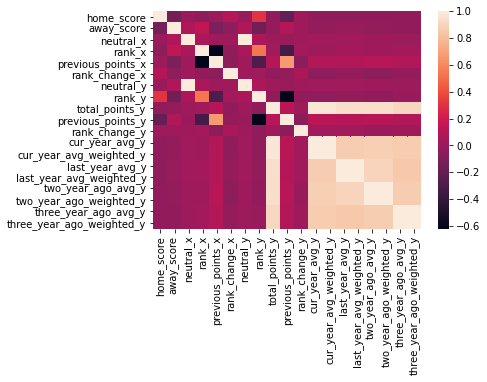

In [129]:
sb.heatmap(final.corr()) 

In [ ]:
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
categorical_features = ['cut', 'color', 'clarity']
le = LabelEncoder()

# Converting the variables to numerical
#
for i in range(3):
    new = le.fit_transform(diamonds[categorical_features[i]])
    diamonds[categorical_features[i]] = new
diamonds.head()

In [131]:
final.drop(["neutral_x","rank_change_x","neutral_y","total_points_y","cur_year_avg_y","cur_year_avg_weighted_y","last_year_avg_y","last_year_avg_weighted_y","two_year_ago_avg_y","two_year_ago_weighted_y","three_year_ago_avg_y","three_year_ago_weighted_y"],axis=1,inplace=True)

In [132]:
final.drop(["rank_x","rank_y","previous_points_y","rank_change_y"],axis=1,inplace=True)

In [133]:
final.head(5)

,home_team,away_team,home_score,away_score,previous_points_x
0,Bolivia,Uruguay,3,1,13
1,Brazil,Mexico,1,1,55
2,Ecuador,Venezuela,5,0,23
3,Guinea,Sierra Leone,1,0,23
4,Paraguay,Argentina,1,3,22


In [135]:
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
categorical_features = ['home_team', 'away_team']
le = LabelEncoder()

# Converting the variables to numerical
#
for i in range(2):
    new = le.fit_transform(final[categorical_features[i]])
    final[categorical_features[i]] = new
final.head()

,home_team,away_team,home_score,away_score,previous_points_x
0,20,150,3,1,13
1,23,90,1,1,55
2,40,153,5,0,23
3,59,125,1,0,23
4,111,7,1,3,22


#8.0 Polynomial Regression

In [159]:
#importing libraries
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


In [202]:
#Get the 2 and the last column from the dataset 
X = final.iloc[:, 1:2].values
y = final.iloc[:, 3].values
print(X)
print(y)

[[150]
 [ 90]
 [153]
 [125]
 [  7]
 [ 32]
 [ 35]
 [148]
 [ 57]
 [ 10]
 [123]
 [ 29]
 [ 23]
 [152]
 [ 26]
 [  2]
 [ 70]
 [157]
 [ 43]
 [ 57]
 [ 82]
 [ 55]
 [ 19]
 [118]
 [109]
 [116]
 [122]
 [110]
 [ 36]
 [ 66]
 [128]
 [ 10]
 [ 14]
 [ 55]
 [136]
 [132]
 [ 54]
 [ 23]
 [ 22]
 [155]
 [150]
 [ 37]
 [134]
 [ 22]
 [ 59]
 [ 94]
 [149]
 [157]
 [134]
 [ 42]
 [ 49]
 [ 90]
 [ 20]
 [132]
 [150]
 [ 50]
 [153]
 [136]
 [ 40]
 [ 70]
 [ 19]
 [ 49]
 [109]
 [ 10]
 [103]
 [137]
 [ 82]
 [ 66]
 [ 55]
 [  8]
 [155]
 [  1]
 [ 29]
 [110]
 [121]
 [ 88]
 [117]
 [118]
 [144]
 [ 55]
 [109]
 [ 70]
 [117]
 [ 93]
 [ 32]
 [112]
 [103]
 [113]
 [101]
 [  7]
 [109]
 [137]
 [144]
 [ 51]
 [ 39]
 [ 52]
 [ 90]
 [157]
 [112]
 [ 52]
 [ 49]
 [  1]
 [ 40]
 [128]
 [ 78]
 [ 15]
 [117]
 [ 94]
 [ 51]
 [118]
 [ 54]
 [134]
 [ 80]
 [ 24]
 [138]
 [ 79]
 [ 57]
 [118]
 [103]
 [ 63]
 [ 39]
 [ 48]
 [ 97]
 [ 90]
 [137]
 [132]
 [ 16]
 [ 91]
 [ 70]
 [ 38]
 [ 20]
 [ 72]
 [ 78]
 [ 59]
 [ 44]
 [ 15]
 [ 23]
 [112]
 [ 90]
 [158]
 [ 98]
 [ 75]
 [118]

In [182]:
print(X)

[]


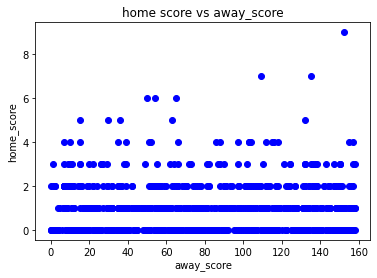

In [203]:
#Since our dataset is pretty clean, let's start by visualizing our dataset by plotting a scatter plot

plt.scatter(X, y, color='blue') 
plt.title('home score vs away_score')
plt.xlabel('away_score')
plt.ylabel('home_score')
plt.show()


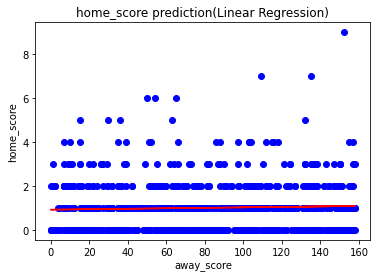

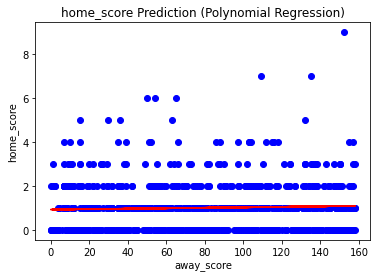

array([1.1092882])

In [217]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.3, random_state=42)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('home_score prediction(Linear Regression)')
plt.xlabel('away_score')
plt.ylabel('home_score')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('home_score Prediction (Polynomial Regression)')
plt.xlabel('away_score')
plt.ylabel('home_score')
plt.show()

pol_reg.predict(poly_reg.fit_transform([[170]]))



In [206]:
final.head(3)

,home_team,away_team,home_score,away_score,previous_points_x
0,20,150,3,1,13
1,23,90,1,1,55
2,40,153,5,0,23


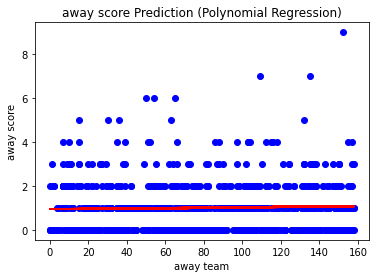

In [218]:
# To improve on the model, all we need to do is to increase degree of the polynomial
# Let's increase the degree to 3

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('away score Prediction (Polynomial Regression)')
plt.xlabel('away team')
plt.ylabel('away score')
plt.show()

In [219]:
# Predict using linear regression
lin_pred = reg_line.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[170]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg.fit_transform(X))

Linear prediction: 0
Polynomial prediction: 1


#9.0 logistic regression

###home score prediction

In [234]:
# Splitting our dataset
#
X = final.drop("home_score",axis=1)
y = final["home_score"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

In [221]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [222]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [223]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 0, 74,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 67,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 60,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  7,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0]])

####Away score prediction

In [224]:
# Splitting our dataset
#
X = final.drop("away_score",axis=1)
y = final["away_score"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [225]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [226]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [227]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[78, 33,  0,  0,  0,  0,  0,  0],
       [60, 26,  0,  0,  0,  0,  0,  0],
       [28, 15,  0,  0,  0,  0,  0,  1],
       [ 7,  6,  0,  0,  0,  0,  0,  1],
       [ 2,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])

#10.0 Residual plots and heteroskedasticity testing

Let's start by creating a model based on our revised set of independent variables above, then displaying the residual plot for it.

In [239]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = correlations.values
y = correlations['home_score'].values

X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, admit_train)

# This is our prediction for admission based on our model
admit_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(admit_predict, admit_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.30406333027159216

Our mean  is close to 1, indicating that we tend to be fairly correct, although slightly over estimating chances 

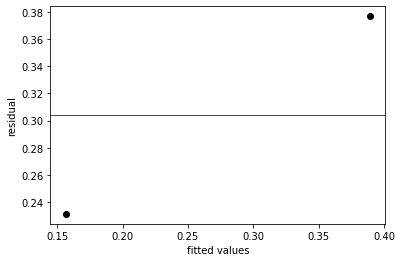

In [240]:
import matplotlib.pyplot as plt

plt.scatter(admit_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

From the our visualisation we can see that the residals are far from the mean and some are away from zero  hence there are no possible patterns

In [233]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(admit_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(admit_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous')




4.38878615413851
the variances are unequal, and the model should be reassessed
